In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import  MinMaxScaler
import logging
import random
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import seaborn as sns

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import geopandas as gpd

In [3]:
coastline = gpd.read_file("maltacoast/coastline_polygon.shp")

# Read Data

In [4]:
station = 'WDD'

stations_sea_rms = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

#random seed for data splitting
randseed = 27

# Split Data

In [5]:
mlvariables = pd.DataFrame(stations_sea_rms)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station) & (mlvariables.columns != 'sea_mode')] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

In [6]:
mlvariables

,WDD/Z/0.05-0.2,WDD/Z/0.2-0.35,WDD/Z/0.35-0.5,WDD/Z/0.5-0.65,WDD/Z/0.65-0.8,WDD/Z/0.8-0.95,WDD/Z/0.95-1.1,WDD/Z/1.1-1.25,WDD/Z/1.25-1.4,WDD/Z/1.4-1.55,...,WDD/E/1.7-1.85,WDD/E/1.85-2.0,"(35.85416793823242, 14.583335876464844)","(35.8125, 14.583335876464844)","(35.8125, 14.458335876464844)","(35.770835876464844, 14.541667938232422)","(35.770835876464844, 14.5)",sea_mean,sea_median,sea_mode
index,,,,,,,,,,,,,,,,,,,,,
2018-05-21 12:00:00+00:00,3.614387e-08,1.522946e-07,1.582771e-07,1.609390e-07,1.378790e-07,1.221293e-07,1.053597e-07,8.387100e-08,6.139844e-08,4.770353e-08,...,2.618785e-08,2.672000e-08,1.091,1.098,0.495,1.015,0.970,0.9338,1.015,0.495
2018-05-21 13:00:00+00:00,3.291389e-08,1.403013e-07,1.486530e-07,1.544386e-07,1.204394e-07,1.110273e-07,9.527776e-08,7.169339e-08,5.767071e-08,4.522353e-08,...,2.317351e-08,2.451549e-08,1.081,1.086,0.492,1.006,0.962,0.9254,1.006,0.492
2018-05-21 14:00:00+00:00,3.265831e-08,1.345240e-07,1.449963e-07,1.470816e-07,1.266649e-07,1.080592e-07,9.016101e-08,7.157595e-08,5.585839e-08,4.567879e-08,...,2.375388e-08,2.247520e-08,1.071,1.075,0.482,0.996,0.954,0.9156,0.996,0.482
2018-05-21 15:00:00+00:00,3.215203e-08,1.253951e-07,1.392609e-07,1.537680e-07,1.216753e-07,1.070363e-07,8.800703e-08,7.156306e-08,5.880311e-08,4.846341e-08,...,2.365922e-08,2.218048e-08,1.061,1.062,0.469,0.985,0.945,0.9044,0.985,0.469
2018-05-21 16:00:00+00:00,3.218804e-08,1.190419e-07,1.335562e-07,1.471871e-07,1.145344e-07,1.048325e-07,9.197984e-08,7.549024e-08,5.735269e-08,4.659520e-08,...,2.186469e-08,2.237959e-08,1.054,1.053,0.459,0.979,0.941,0.8972,0.979,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-17 20:00:00+00:00,5.017983e-08,3.973182e-08,4.613535e-08,4.300860e-08,3.488897e-08,3.122179e-08,2.037265e-08,1.571132e-08,1.166662e-08,9.974382e-09,...,7.421879e-09,9.179798e-09,0.217,0.211,0.221,0.265,0.279,0.2386,0.221,0.211
2019-06-17 21:00:00+00:00,2.855341e-08,3.526153e-08,4.403386e-08,4.255388e-08,3.328610e-08,2.732168e-08,2.160796e-08,1.732466e-08,1.521850e-08,1.146022e-08,...,7.278241e-09,8.916584e-09,0.230,0.227,0.226,0.279,0.290,0.2504,0.230,0.226
2019-06-17 22:00:00+00:00,2.577513e-08,3.647311e-08,4.069297e-08,4.022048e-08,3.134774e-08,2.723837e-08,2.140779e-08,1.853938e-08,1.505948e-08,1.154771e-08,...,6.871405e-09,8.816023e-09,0.223,0.222,0.214,0.272,0.281,0.2424,0.223,0.214


In [7]:
#scale values between 0 and 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#fit the scalers
scaler_x.fit(X) 
scaler_y.fit(Y)

MinMaxScaler()

In [8]:
#apply the scalers
Xscale = scaler_x.transform(X) 
Yscale = scaler_y.transform(Y)

In [9]:
#number of chunks in training/test set
nchunks = 40

#number of ks for kfold cross validation
kfolds = 5

lenchunk = round(Xscale.shape[0]/nchunks)

In [10]:
#Generates k-th datasets for Cross Validation 
list_of_dataset = [{'idx': [], 'XscaleTrain': [], 'YscaleTrain': [], 'XscaleTest': [], 'YscaleTest': []} for number in range(kfolds)]

In [11]:
#split data into 40 chunks (or nchunks)
all_chunks = np.array_split(np.arange(Xscale.shape[0]), nchunks)

#random shuffle of chunks
random.seed(randseed)
random.shuffle(all_chunks)

#this method only works if nchunks is perfectly divisible by kfolds (eg 40/5 = 8)
if nchunks % kfolds != 0:
    raise ValueError("Number of chunks must be divisible by number of folds.")

nchunks_per_fold = nchunks // kfolds

#assign chunks to folds
for i in range(kfolds):
    test_chunks = all_chunks[i*nchunks_per_fold : (i+1)*nchunks_per_fold] #separate date from chunk i=1: 0 to 7, i=2: 8 to 15...
    train_chunks = all_chunks[ : i*nchunks_per_fold] + all_chunks[(i+1)*nchunks_per_fold:] #one set for test set, remaining for training
    train_idx = np.concatenate(train_chunks)
    test_idx = np.concatenate(test_chunks)
    
    list_of_dataset[i]['idx'] = train_idx
    list_of_dataset[i]['XscaleTrain'] = Xscale[train_idx, :]
    list_of_dataset[i]['YscaleTrain'] = Yscale[train_idx, :]
    list_of_dataset[i]['XscaleTest'] = Xscale[test_idx, :]
    list_of_dataset[i]['YscaleTest'] = Yscale[test_idx, :]

In [12]:
len(list_of_dataset[0]['idx'])

7537

# Build and train RF Regressor

In [13]:
# random forest maximum depth     
RF_max_depth = 10

# random forest number of estimators  
RF_n_estimators = 100

# random forest maximum features 
RF_max_features = 'log2'

# random forest min samples to split
RF_min_samples_split = 5

#random forest min samples per leaf
RF_min_samples_leaf = 3

In [14]:
RF_model = RandomForestRegressor(bootstrap = True,
                                 max_depth=RF_max_depth,
                                 n_estimators=RF_n_estimators,
                                 max_features= RF_max_features,
                                 min_samples_split = RF_min_samples_split,
                                 min_samples_leaf = RF_min_samples_leaf,
                                 verbose=1)

In [15]:
#Initiliaze the empty variables
Ypred = None
YTest = None

In [16]:
#Applies the learning/prediction to the k datasets
Ypred_kfold = []
YTest_kfold = []

for i, dic in enumerate(list_of_dataset):
    Ypred = None
    YTest = None
    
    #Fits the model to training data
    RF_model.fit(dic['XscaleTrain'], dic['YscaleTrain'])
    
    #Predicts the sea wave data by using the testing data
    ypred  = RF_model.predict(dic['XscaleTest'])
    
    #Inverts the scaling of the data and stores the results in the predicted/testing arrays
    Ypred = scaler_y.inverse_transform(ypred)
    YTest = scaler_y.inverse_transform(dic['YscaleTest'])
    
    #Append to kfold results
    Ypred_kfold.append(Ypred)
    YTest_kfold.append(YTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [17]:
len(Ypred_kfold)

5

# Compute evaluation metrics and save data to parquet

In [18]:
results = []

#the names of the target variables are the last eight columns of the station data
target_names = mlvariables.columns[-8:-1].tolist()
for f in range(kfolds):
    Ypred = Ypred_kfold[f]
    YTest = YTest_kfold[f]

    #convert to df to save the data
    Ypred_df = pd.DataFrame(Ypred)
    YTest_df = pd.DataFrame(YTest)

    #save to parquet to preserve dat
    Ypred_df.to_parquet(f"results/kfold_data/{station}/fold{f}_Ypred.parquet", engine="pyarrow")
    YTest_df.to_parquet(f"results/kfold_data/{station}/fold{f}_YTest.parquet", engine="pyarrow")
    
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(YTest[:, i], Ypred[:, i])
        mse = mean_squared_error(YTest[:, i], Ypred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(YTest[:, i], Ypred[:, i])
    
        #append the results as a row
        results.append([f, station, target, RF_max_depth, RF_n_estimators, RF_max_features, mae, mse, rmse, r2])

#creates results dataframe
results_df = pd.DataFrame(results, columns=["Fold", "Station", "Target Variable", "RF_max_depth", "RF_n_estimators", "RF_max_features", "MAE", "MSE", "RMSE", "R2"])

In [19]:
results_df

,Fold,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
0,0,WDD,"(35.85416793823242, 14.583335876464844)",10,100,log2,0.143889,0.049931,0.223452,0.837251
1,0,WDD,"(35.8125, 14.583335876464844)",10,100,log2,0.150328,0.053278,0.230820,0.828814
2,0,WDD,"(35.8125, 14.458335876464844)",10,100,log2,0.099588,0.020550,0.143353,0.776002
3,0,WDD,"(35.770835876464844, 14.541667938232422)",10,100,log2,0.112465,0.028224,0.168001,0.884193
4,0,WDD,"(35.770835876464844, 14.5)",10,100,log2,0.103920,0.024167,0.155457,0.888690
5,0,WDD,sea_mean,10,100,log2,0.101956,0.023402,0.152978,0.885760
6,0,WDD,sea_median,10,100,log2,0.113905,0.029379,0.171402,0.880119
7,1,WDD,"(35.85416793823242, 14.583335876464844)",10,100,log2,0.288297,0.400091,0.632527,0.555025
8,1,WDD,"(35.8125, 14.583335876464844)",10,100,log2,0.284477,0.363407,0.602832,0.597519
9,1,WDD,"(35.8125, 14.458335876464844)",10,100,log2,0.170469,0.101264,0.318220,0.812665


# Evaluate k-fold results

In [20]:
sea_mean_results = results_df[(results_df["Target Variable"] == "sea_mean")]
sea_mean_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,10.0,100.0,0.133728,0.051136,0.214791,0.875743
std,1.581139,0.0,0.0,0.033575,0.041312,0.079065,0.032505
min,0.000000,10.0,100.0,0.101956,0.023402,0.152978,0.823331
25%,1.000000,10.0,100.0,0.110847,0.030799,0.175497,0.877316
50%,2.000000,10.0,100.0,0.127221,0.036189,0.190235,0.879675
75%,3.000000,10.0,100.0,0.141248,0.041203,0.202985,0.885760
max,4.000000,10.0,100.0,0.187367,0.124087,0.352260,0.912634


In [21]:
sea_median_results = results_df[(results_df["Target Variable"] == "sea_median")]
sea_median_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,10.0,100.0,0.150804,0.061912,0.237398,0.874262
std,1.581139,0.0,0.0,0.040121,0.046939,0.083325,0.027878
min,0.000000,10.0,100.0,0.113905,0.029379,0.171402,0.833547
25%,1.000000,10.0,100.0,0.118859,0.034441,0.185583,0.860729
50%,2.000000,10.0,100.0,0.142279,0.044777,0.211606,0.880119
75%,3.000000,10.0,100.0,0.167225,0.057291,0.239356,0.892857
max,4.000000,10.0,100.0,0.211751,0.143673,0.379043,0.904057


# Plot some Data

In [22]:
#find the best performing fold
best_model_R2 = sea_mean_results.loc[sea_mean_results["R2"].idxmax()]
print(best_model_R2)

Fold                      4
Station                 WDD
Target Variable    sea_mean
RF_max_depth             10
RF_n_estimators         100
RF_max_features        log2
MAE                0.127221
MSE                0.036189
RMSE               0.190235
R2                 0.912634
Name: 33, dtype: object


Fold 3 (the first fold) produced the highest R2 for sea_mean

In [23]:
bestfoldnum = 4

In [24]:
best_Ypred = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_Ypred.parquet")
best_YTest = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_YTest.parquet")

In [25]:
best_Ypred

,0,1,2,3,4,5,6
0,0.545414,0.549119,0.468253,0.602298,0.605899,0.554197,0.579554
1,0.813027,0.827371,1.010989,1.084595,1.121858,0.971568,1.052453
2,0.831013,0.851868,1.032497,1.109168,1.144061,0.993722,1.074245
3,0.885221,0.917875,1.072497,1.162356,1.189295,1.045449,1.121195
4,0.919001,0.960162,1.118810,1.221250,1.246146,1.093074,1.175407
...,...,...,...,...,...,...,...
1880,2.944311,2.966803,2.059961,3.035152,2.987447,2.798735,3.000966
1881,2.537655,2.551236,1.715274,2.614321,2.567686,2.397234,2.588531
1882,2.322270,2.328430,1.512676,2.368108,2.316855,2.169668,2.347741
1883,2.358906,2.369822,1.422579,2.325685,2.241246,2.143648,2.303478


In [26]:
# we need to find the index in date/time of the test set, as it was lost in transformation

#create the full list of indexes - for WDD there were 9421 rows of data
full_list = list(range(mlvariables.shape[0]))

#identify the numbers that are to be removed for bestfold
remove_list = list_of_dataset[bestfoldnum]['idx']

#remove the indexes that were part of the training set from the index
filtered_list = list(set(full_list) - set(remove_list))

#retrieve the index from the original dataframe mlvariables, to get date and time stamps
match_index = mlvariables.iloc[filtered_list].index

best_Ypred.index = match_index
best_YTest.index = match_index

#update the header
header = [
    (35.85416793823242, 14.583335876464844),
    (35.8125, 14.583335876464844),
    (35.8125, 14.458335876464844),
    (35.770835876464844, 14.541667938232422),
    (35.770835876464844, 14.5),
    "sea_mean",
    "sea_median"
]

best_Ypred.columns = header
best_YTest.columns = header

In [27]:
best_Ypred

,"(35.85416793823242, 14.583335876464844)","(35.8125, 14.583335876464844)","(35.8125, 14.458335876464844)","(35.770835876464844, 14.541667938232422)","(35.770835876464844, 14.5)",sea_mean,sea_median
index,,,,,,,
2019-04-30 02:00:00+00:00,0.545414,0.549119,0.468253,0.602298,0.605899,0.554197,0.579554
2019-04-30 03:00:00+00:00,0.813027,0.827371,1.010989,1.084595,1.121858,0.971568,1.052453
2019-04-30 04:00:00+00:00,0.831013,0.851868,1.032497,1.109168,1.144061,0.993722,1.074245
2019-04-30 05:00:00+00:00,0.885221,0.917875,1.072497,1.162356,1.189295,1.045449,1.121195
2019-04-30 06:00:00+00:00,0.919001,0.960162,1.118810,1.221250,1.246146,1.093074,1.175407
...,...,...,...,...,...,...,...
2019-03-21 17:00:00+00:00,2.944311,2.966803,2.059961,3.035152,2.987447,2.798735,3.000966
2019-03-21 18:00:00+00:00,2.537655,2.551236,1.715274,2.614321,2.567686,2.397234,2.588531
2019-03-21 19:00:00+00:00,2.322270,2.328430,1.512676,2.368108,2.316855,2.169668,2.347741


In [28]:
best_YTest

,"(35.85416793823242, 14.583335876464844)","(35.8125, 14.583335876464844)","(35.8125, 14.458335876464844)","(35.770835876464844, 14.541667938232422)","(35.770835876464844, 14.5)",sea_mean,sea_median
index,,,,,,,
2019-04-30 02:00:00+00:00,0.826,0.920,1.205,1.189,1.204,1.0688,1.189
2019-04-30 03:00:00+00:00,0.857,0.962,1.262,1.248,1.262,1.1182,1.248
2019-04-30 04:00:00+00:00,0.871,0.985,1.302,1.291,1.304,1.1506,1.291
2019-04-30 05:00:00+00:00,0.873,0.995,1.330,1.320,1.334,1.1704,1.320
2019-04-30 06:00:00+00:00,0.881,1.010,1.356,1.349,1.363,1.1918,1.349
...,...,...,...,...,...,...,...
2019-03-21 17:00:00+00:00,2.890,2.870,1.107,2.633,2.507,2.4014,2.633
2019-03-21 18:00:00+00:00,2.751,2.738,1.059,2.521,2.404,2.2946,2.521
2019-03-21 19:00:00+00:00,2.616,2.608,1.012,2.408,2.299,2.1886,2.408


In [29]:
best_Ypred.index = best_Ypred.index.tz_convert(None)
best_YTest.index = best_YTest.index.tz_convert(None)

In [30]:
print(best_YTest.index.tolist())

[Timestamp('2019-04-30 02:00:00'), Timestamp('2019-04-30 03:00:00'), Timestamp('2019-04-30 04:00:00'), Timestamp('2019-04-30 05:00:00'), Timestamp('2019-04-30 06:00:00'), Timestamp('2019-04-30 07:00:00'), Timestamp('2019-04-30 08:00:00'), Timestamp('2019-04-30 09:00:00'), Timestamp('2019-04-30 10:00:00'), Timestamp('2019-04-30 11:00:00'), Timestamp('2019-04-30 12:00:00'), Timestamp('2019-04-30 13:00:00'), Timestamp('2019-04-30 14:00:00'), Timestamp('2019-04-30 15:00:00'), Timestamp('2019-04-30 16:00:00'), Timestamp('2019-04-30 17:00:00'), Timestamp('2019-04-30 18:00:00'), Timestamp('2019-04-30 19:00:00'), Timestamp('2019-04-30 20:00:00'), Timestamp('2019-04-30 21:00:00'), Timestamp('2019-04-30 22:00:00'), Timestamp('2019-04-30 23:00:00'), Timestamp('2019-05-01 00:00:00'), Timestamp('2019-05-01 01:00:00'), Timestamp('2019-05-01 02:00:00'), Timestamp('2019-05-01 03:00:00'), Timestamp('2019-05-01 04:00:00'), Timestamp('2019-05-01 05:00:00'), Timestamp('2019-05-01 06:00:00'), Timestamp('20

#best_Ypred.to_csv(f"results/kfold_data/{station}/bestYpred.csv")

2019-03-21 21:00:00
2018-12-23 03:00:00
2018-09-20 00:00:00
2018-06-30 01:00:00


Text(0.5, 0.98, 'Plots of estimated SWH around station WDD for various time intervals')

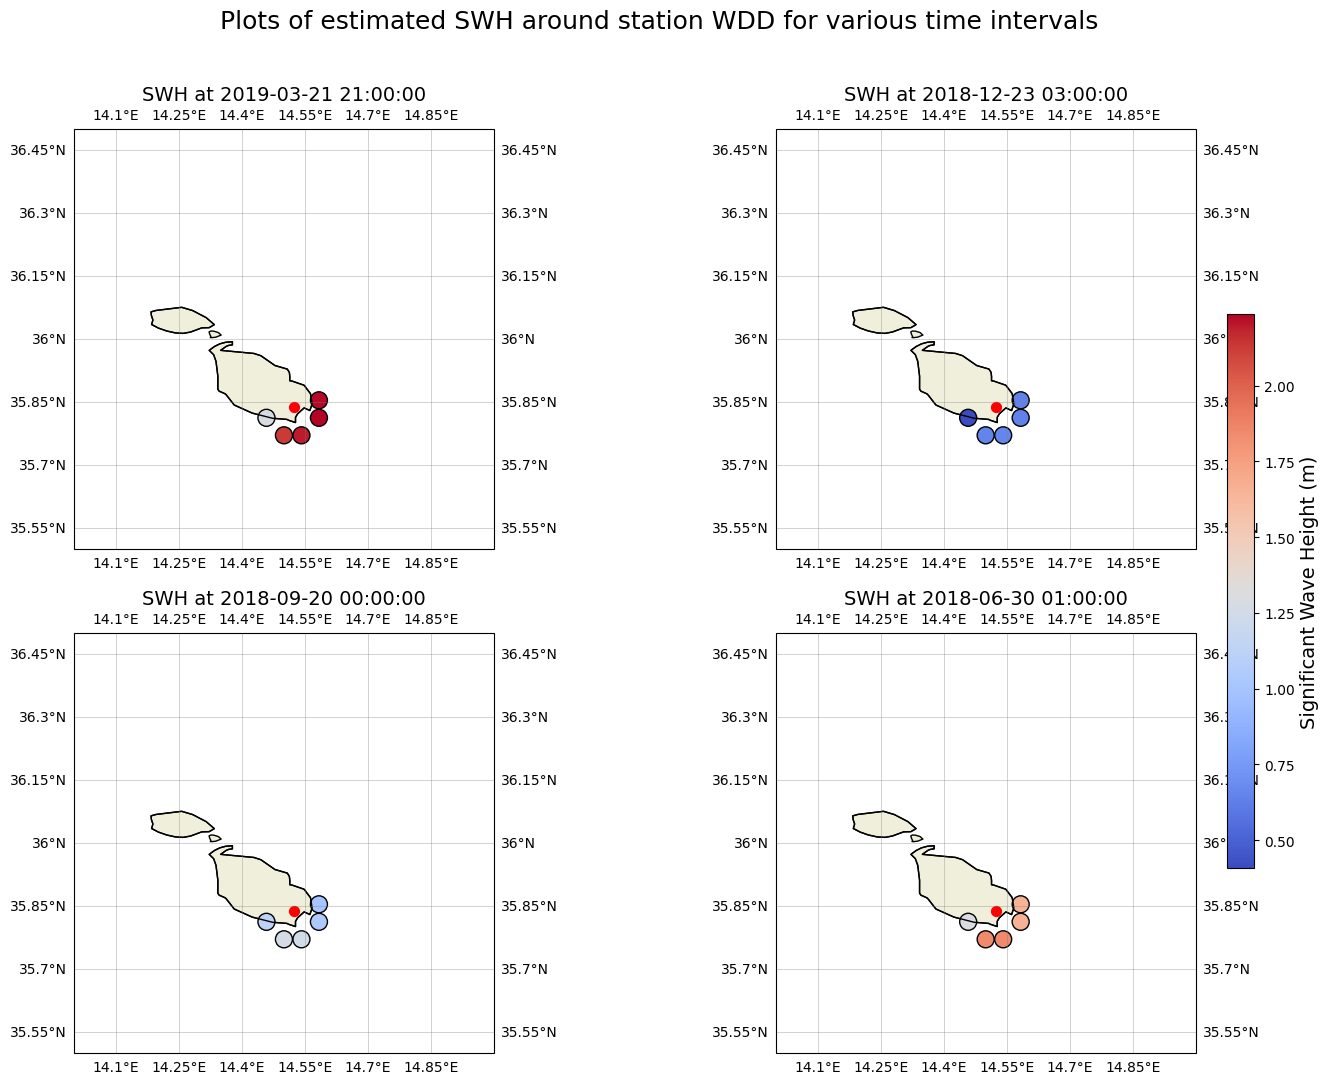

In [31]:
#Plot four timestamps in four subplots
best_Ypred.index = pd.to_datetime(best_Ypred.index)

selected_timestamps = [
    pd.to_datetime("2019-03-21 21:00:00"),
    pd.to_datetime("2018-12-23 03:00:00"),
    pd.to_datetime("2018-09-20 00:00:00"),
    pd.to_datetime("2018-06-30 01:00:00")
]

timestamps_to_plot = best_Ypred.loc[selected_timestamps]

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [14.0, 15.0, 35.5, 36.5]

#create the subplots
for timestamp, ax in zip(timestamps_to_plot.index, axes.flat):
    print(timestamp)

    #set map extent
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    #add map features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    #plot seismic stations - WDD
    ax.scatter(14.5242, 35.837299, color='red', marker='o', s=50, label='Seismic Stations')

    #get wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp, :]
    wave_heights = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords = wave_heights.index.to_list() #get the coordinates of the gridpoints
    lons, lats = zip(*coords)
    heights = wave_heights.values

    #scatter plot of wave heights
    sc = ax.scatter(lats, lons, c=heights, cmap='coolwarm', edgecolor='black', s=150, vmin=timestamps_to_plot.min().min(), vmax=timestamps_to_plot.max().max())

    #add title
    ax.set_title(f"SWH at {timestamp}", fontsize=14)

    #add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

Text(0.5, 0.98, 'Plots of estimated and actual SWH around station WDD for various time intervals')

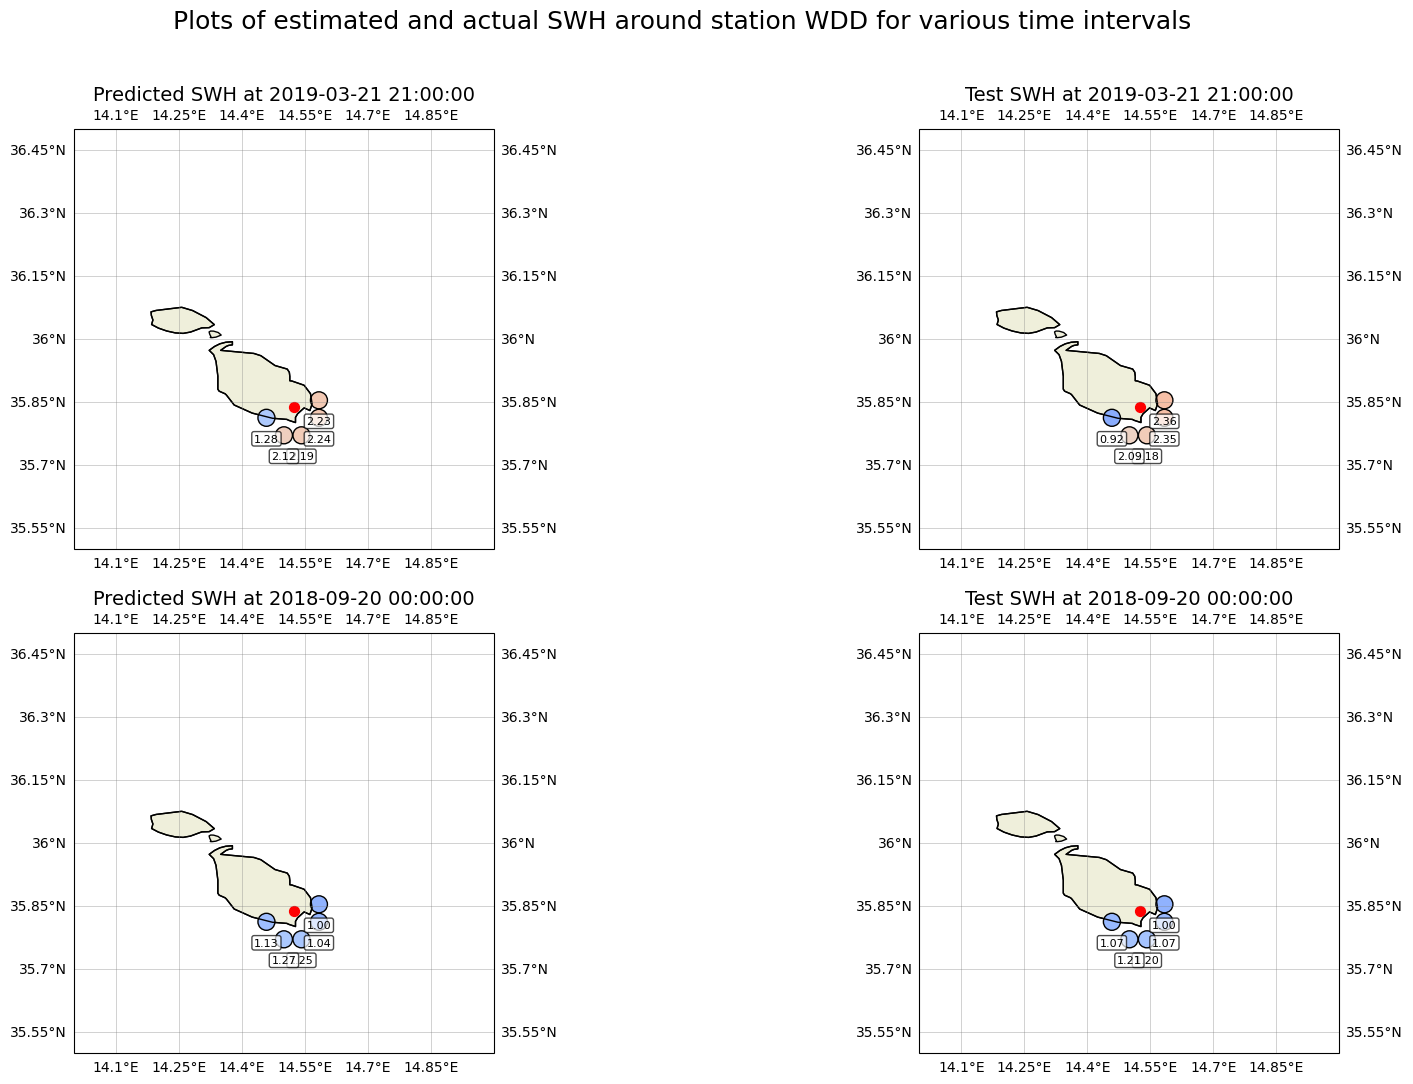

In [32]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2019-03-21 21:00:00"),
    pd.to_datetime("2018-09-20 00:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [14.0, 15.0, 35.5, 36.5]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=ccrs.PlateCarree())
    ax_test.set_extent(map_extent, crs=ccrs.PlateCarree())
    
    #add map features
    for ax in [ax_pred, ax_test]:
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(14.5242, 35.837299, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.05, f"{height:.2f}", fontsize=8, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.05, f"{height:.2f}", fontsize=8, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

# Aesthetic Map

File provided by Geosciences Dept

In [33]:
print(coastline.head())
print(coastline.crs)

   Id                                           geometry
0 NaN  POLYGON ((458635.564 3963434.287, 458635.61 39...
1 NaN  POLYGON ((460268.463 3963960.375, 460268.694 3...
2 NaN  POLYGON ((460547.895 3964817.748, 460547.598 3...
3 NaN  POLYGON ((456786.014 3973289.117, 456785.569 3...
4 NaN  POLYGON ((454418.513 3975967.51, 454418.966 39...
EPSG:32633


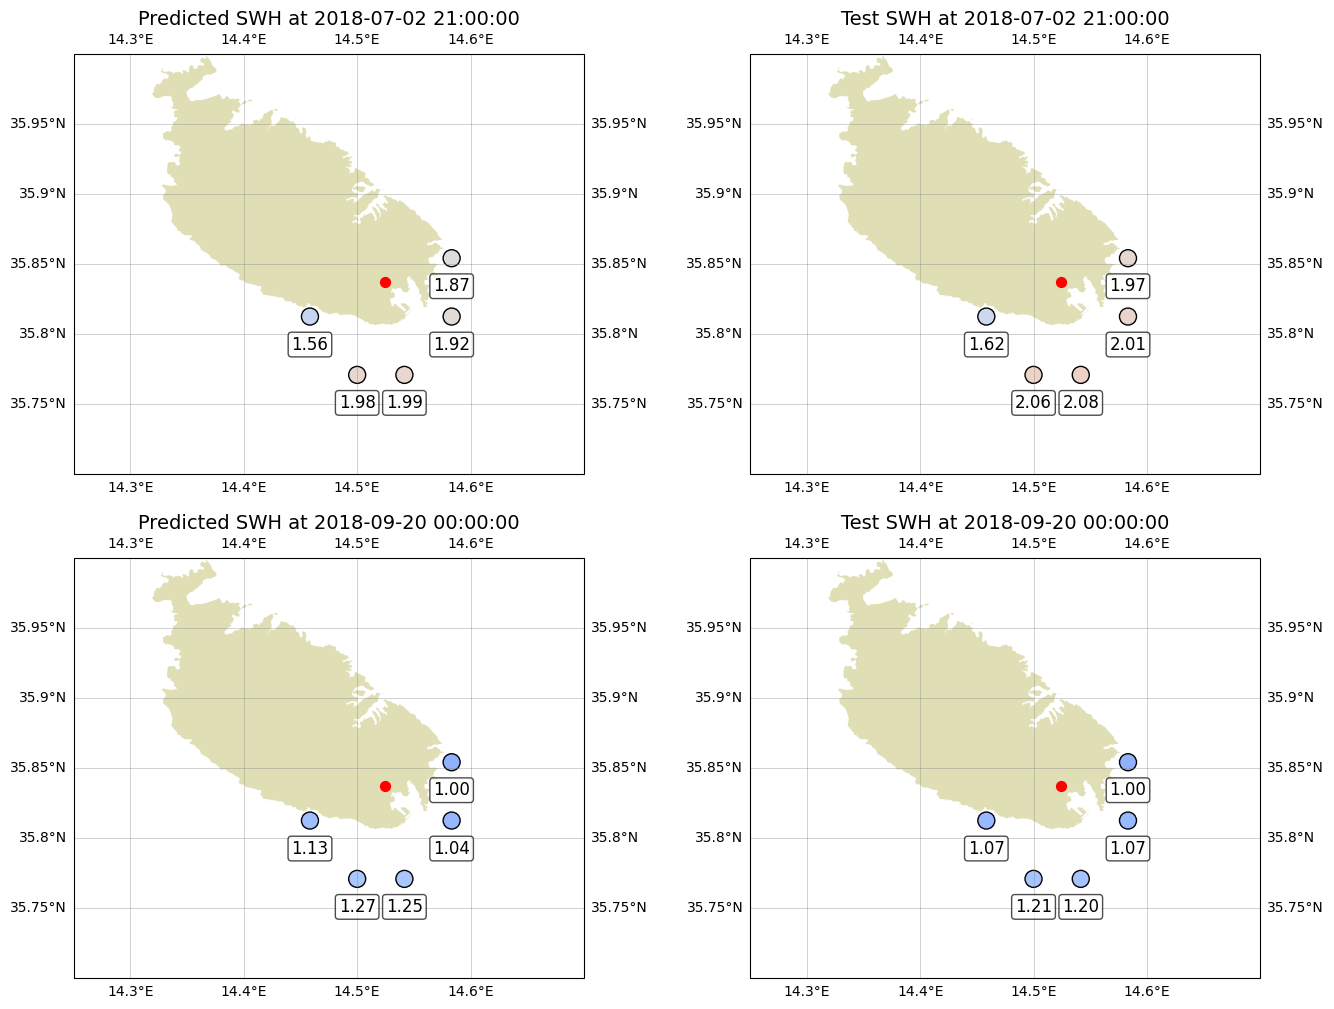

In [40]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2018-07-02 21:00:00"),
    pd.to_datetime("2018-09-20 00:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

proj = ccrs.PlateCarree()

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), subplot_kw={'projection': proj})

#set map extent [west, east, south, north]
map_extent = [14.25, 14.7, 35.7, 36.0]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=proj)
    ax_test.set_extent(map_extent, crs=proj)
    
    #add map features
    for ax in [ax_pred, ax_test]:
        #get coastline from file
        coastline.to_crs(epsg=4326).plot(ax=ax, transform=proj, color='#DFDEB4', linewidth=1.5)
        #ax.add_feature(cfeature.LAND, edgecolor='black')
        #ax.add_feature(cfeature.COASTLINE)
        #ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(14.5242, 35.837299, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

#fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

plt.show()

# Time Series

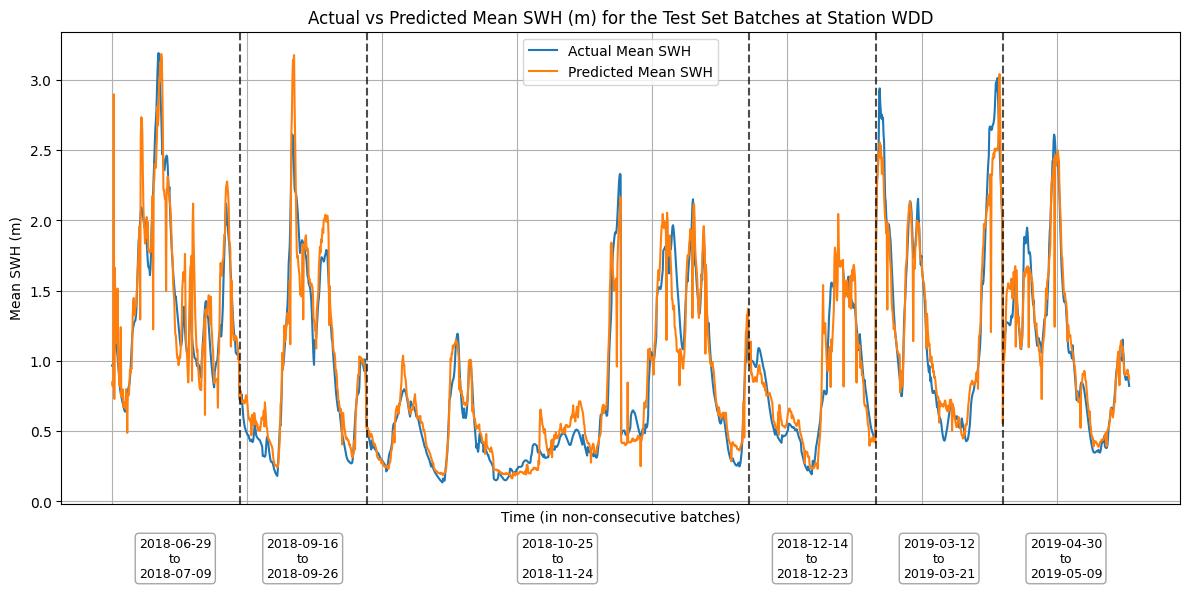

In [41]:
best_YTest.index = pd.to_datetime(best_YTest.index)
best_Ypred.index = pd.to_datetime(best_Ypred.index)

#YTest and Ypred share the same index
sea_mean_df = pd.DataFrame({'Actual': best_YTest.loc[best_Ypred.index, 'sea_mean'],
                            'Predicted': best_Ypred.loc[best_Ypred.index, 'sea_mean']
                           })

#reset the index to plot skipped parts where there is no data
sea_mean_df = sea_mean_df.reset_index()
sea_mean_df.rename(columns={'index': 'Timestamp'}, inplace=True)
sea_mean_df = sea_mean_df.sort_values('Timestamp').reset_index(drop=True)

#find when time gap is greater than 2 hours
time_deltas = sea_mean_df['Timestamp'].diff().dt.total_seconds() / 3600 #convert to hours
vline_spacing = time_deltas[time_deltas >= 2].index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sea_mean_df.index, sea_mean_df['Actual'], label='Actual Mean SWH')
ax.plot(sea_mean_df.index, sea_mean_df['Predicted'], label='Predicted Mean SWH')

#plot vertical lines
for x in vline_spacing:
    ax.axvline(x=x, color='black', alpha=0.7, linestyle='--')

#get xlabels
chunk_ends = [vline_spacing[0]-1] + [vline_spacing[j+1]-1 for j in range(len(vline_spacing)-1)] + [len(sea_mean_df)-1]
chunk_starts = [0] + vline_spacing

for start, end in zip(chunk_starts, chunk_ends):
    midpoint = (start + end) // 2
    start_time = sea_mean_df.loc[start, 'Timestamp'].strftime('%Y-%m-%d')
    end_time = sea_mean_df.loc[end, 'Timestamp'].strftime('%Y-%m-%d')
    label = f"{start_time}\nto\n{end_time}"

    ax.text(midpoint, -0.07, label, transform=ax.get_xaxis_transform(),
            ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
    
#switch off default x ticks, major and minor, from the bottom and the top and remove xlabels
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Time (in non-consecutive batches)")
plt.ylabel("Mean SWH (m)")
plt.title(f"Actual vs Predicted Mean SWH (m) for the Test Set Batches at Station {station}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()